<a href="https://colab.research.google.com/github/nureeee/Visualization/blob/main/210602_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/house-price-clean.csv')

In [3]:
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,60㎡이하,2020,2,4039
4502,제주,60㎡초과 85㎡이하,2020,2,3962
4503,제주,85㎡초과 102㎡이하,2020,2,0


규모인 부분이 전체인 데이터 삭제

In [26]:
## 삭제할 인덱스 얻어내기
drop_idx = df.loc[df['규모구분'] == '전체', '규모구분'].index

## drop
df = df.drop(drop_idx)
df.head()

,지역명,규모구분,연도,월,분양가격
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488


In [27]:
df = df.reset_index(drop=True)
df.head()

,지역명,규모구분,연도,월,분양가격
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488


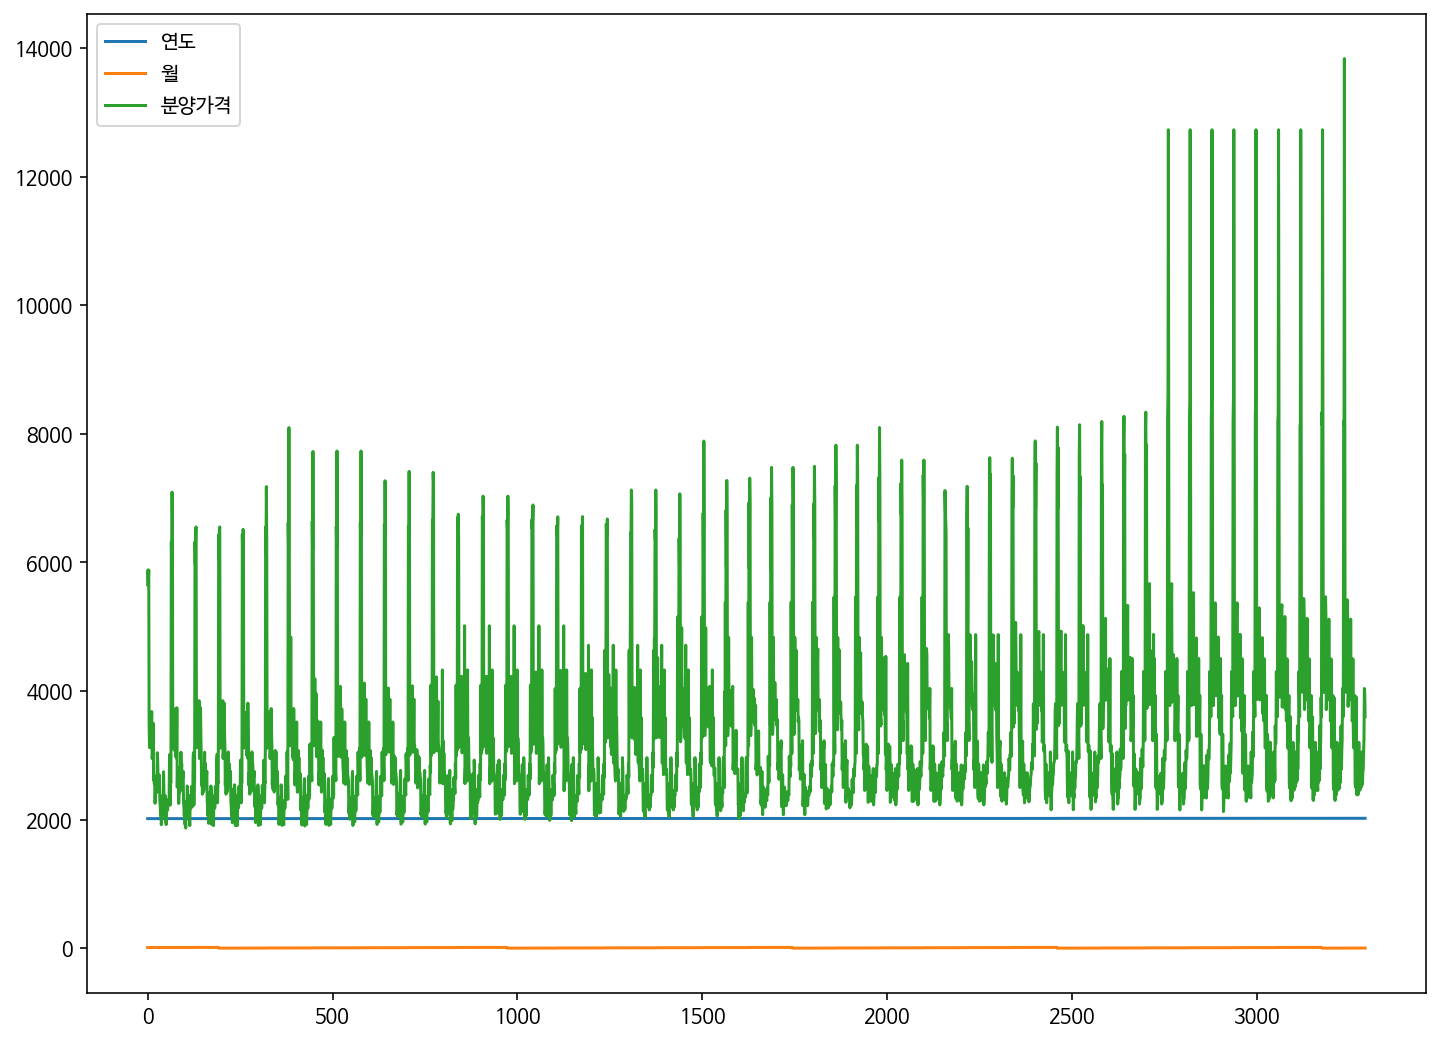

In [28]:
df.plot() ## 플롯함수를 활용하여 그래프를 그림
## 

**선택사항**

그래프의 크기를 고정하기

In [29]:
# 그래프 크기를 키워서 따로 설정하지 않는 한 고정될 수 있도록
plt.rcParams['figure.figsize'] = (12, 9)  ## 12대 9 비율

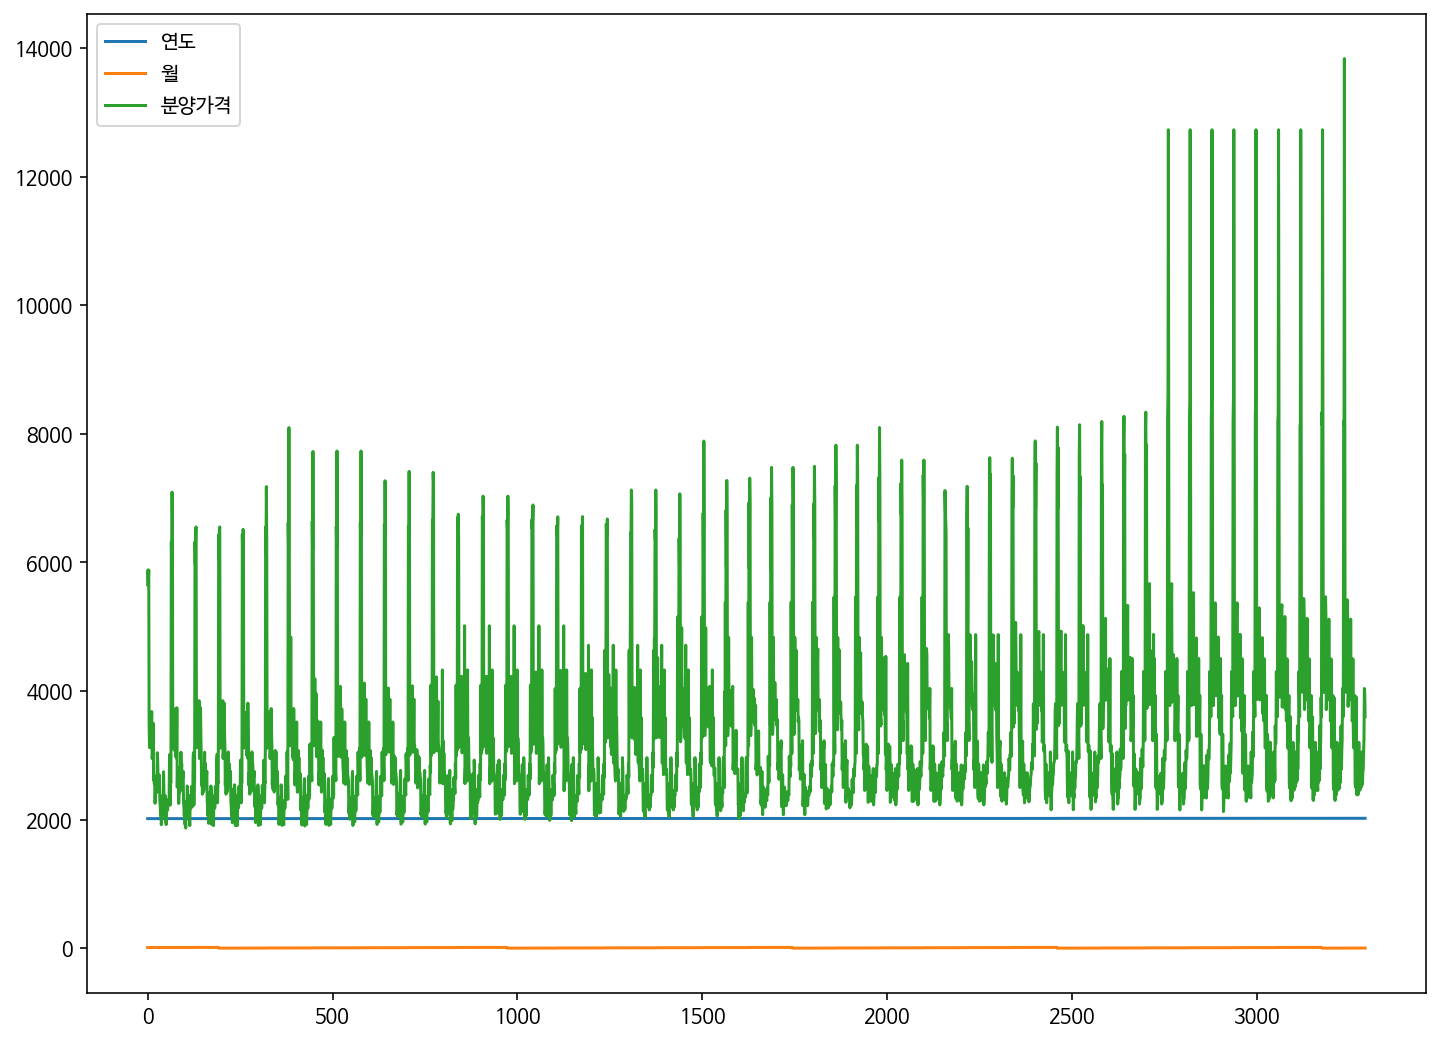

In [30]:
df.plot()

## 1.line 그래프 
- 데이터가 연속적인 특징을 띄고 있을 때 사용하기 좋다.
- 유전자 데이터 : 순서가 바뀌면 아예 의미를 잃어버리는 데이터( eg 텍스트)
- 시간에 흐름에 따라서 수집된 데이터(eg주식데이터)
- 일정시간 동안 집계된 데이터( eg일정기간 강우량)

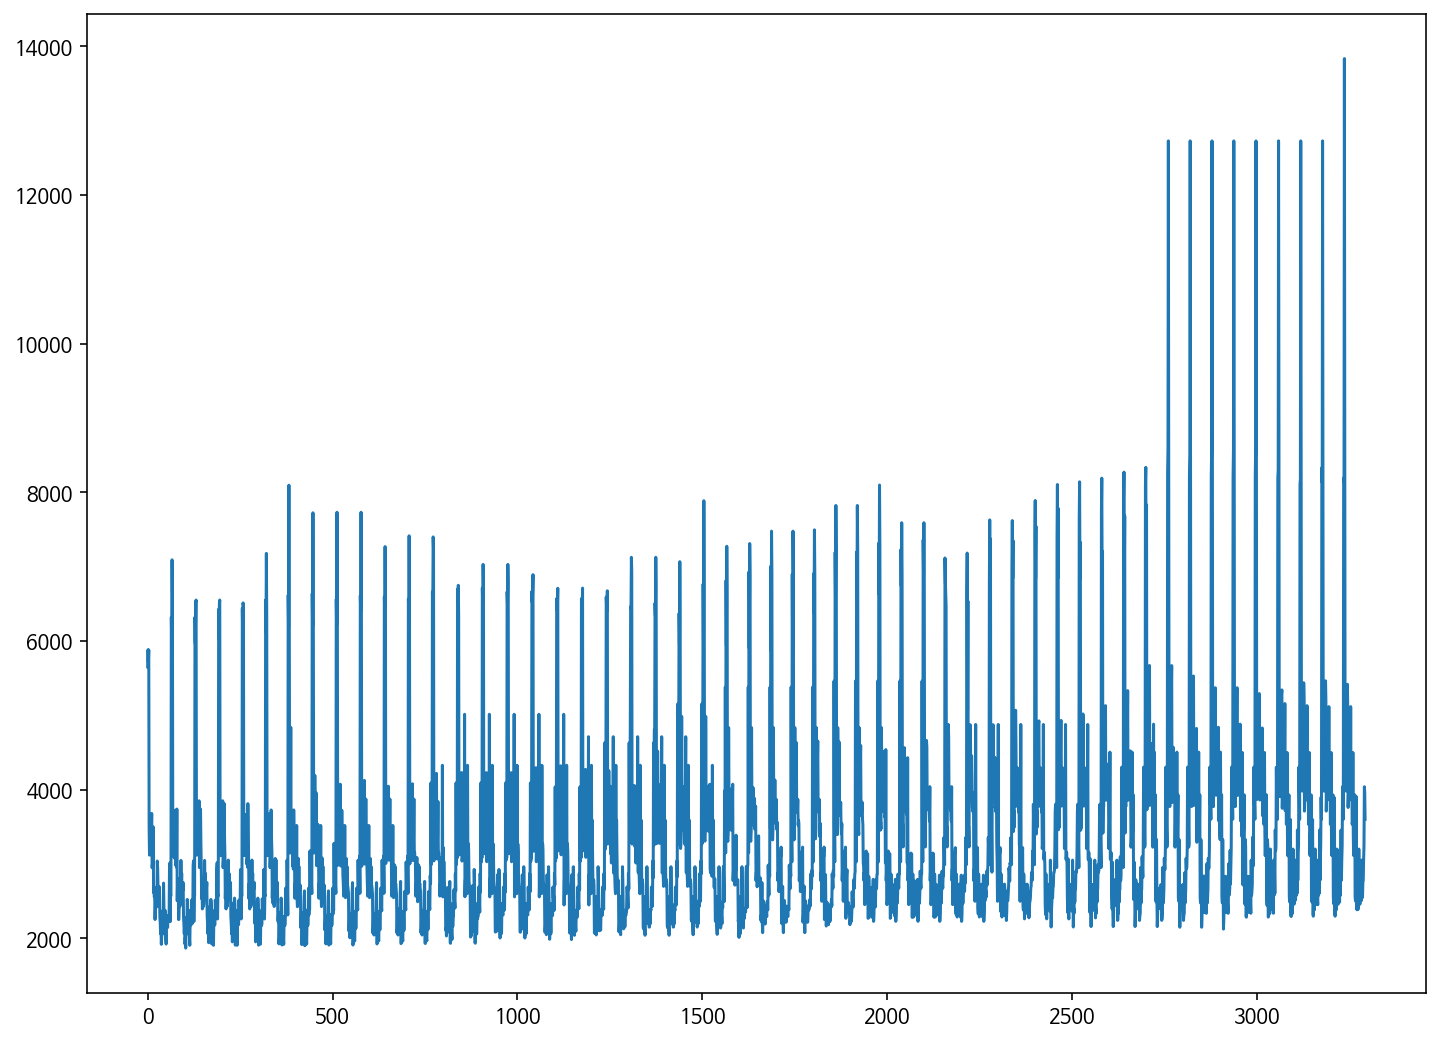

In [31]:
# x축을 따로 지정하지 않으면 데이터 프레임의 인덱스가 x축이 된다

df['분양가격'].plot(kind='line')

In [32]:
# 서울 지역의 데이터 뽑기
df_seoul = df.loc[df['지역명'] == '서울']
df_seoul.head()

,지역명,규모구분,연도,월,분양가격
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320


In [33]:
# 연도별 분양가 평균 구하기
df_seoul_year = df_seoul.groupby('연도')['분양가격'].mean()
df_seoul_year

연도
2015    6201.000000
2016    6674.520833
2017    6658.729167
2018    7054.687500
2019    8735.083333
2020    9647.375000
Name: 분양가격, dtype: float64

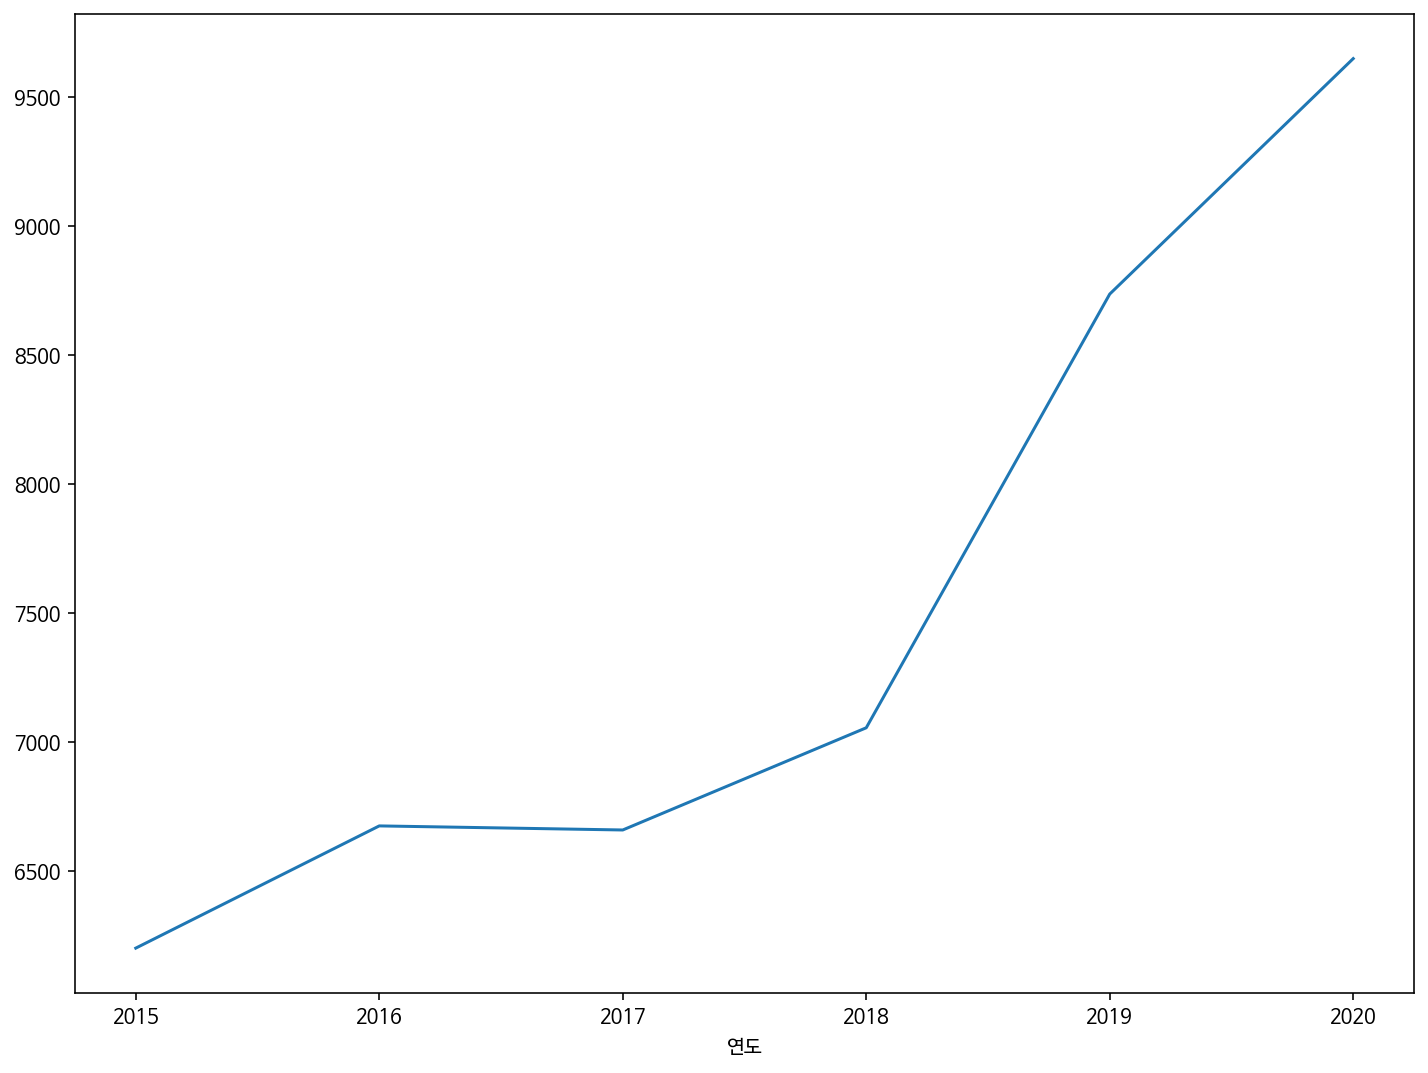

In [34]:
df_seoul_year.plot(kind='line')

# bar 그래프
bar 그래프는 그룹별(카테고리별)로 비교할 때 유용


In [35]:
#지역별 분양가 평균
local_price_mean = df.groupby('지역명')['분양가격'].mean()
local_price_mean

지역명
강원    2448.156863
경기    4133.952830
경남    2858.932367
경북    2570.465000
광주    3055.043750
대구    3679.620690
대전    3176.127389
부산    3691.981132
서울    7308.943396
세종    2983.543147
울산    2990.373913
인천    3684.302885
전남    2326.250000
전북    2381.416268
제주    3472.677966
충남    2534.950000
충북    2348.183962
Name: 분양가격, dtype: float64

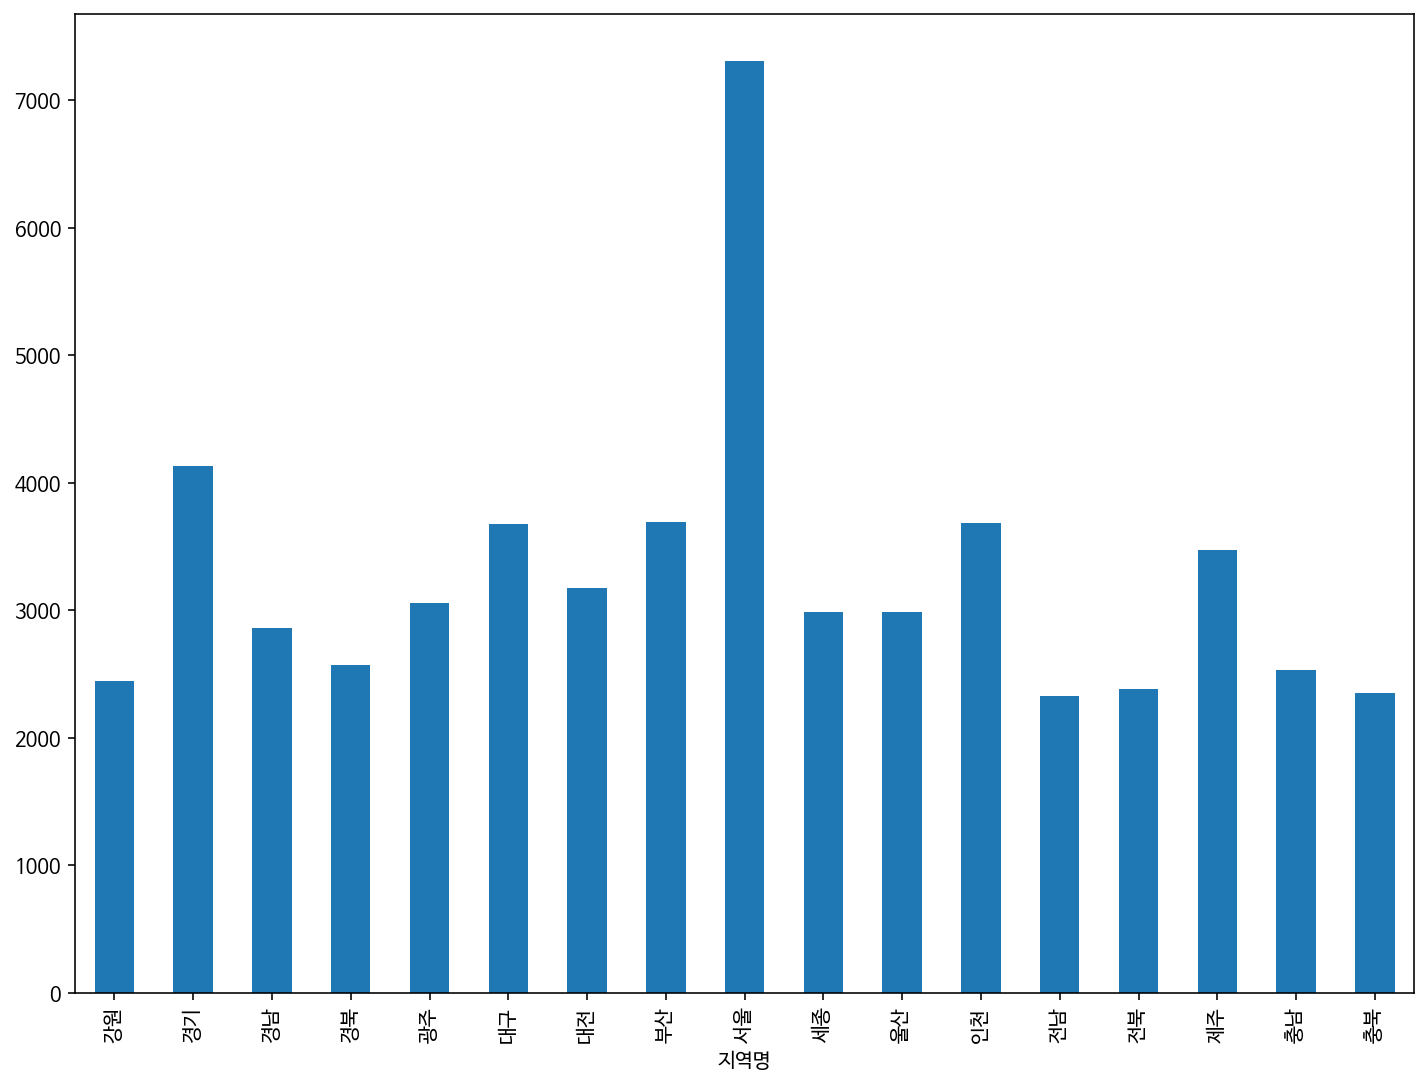

In [36]:
local_price_mean.plot(kind='bar')

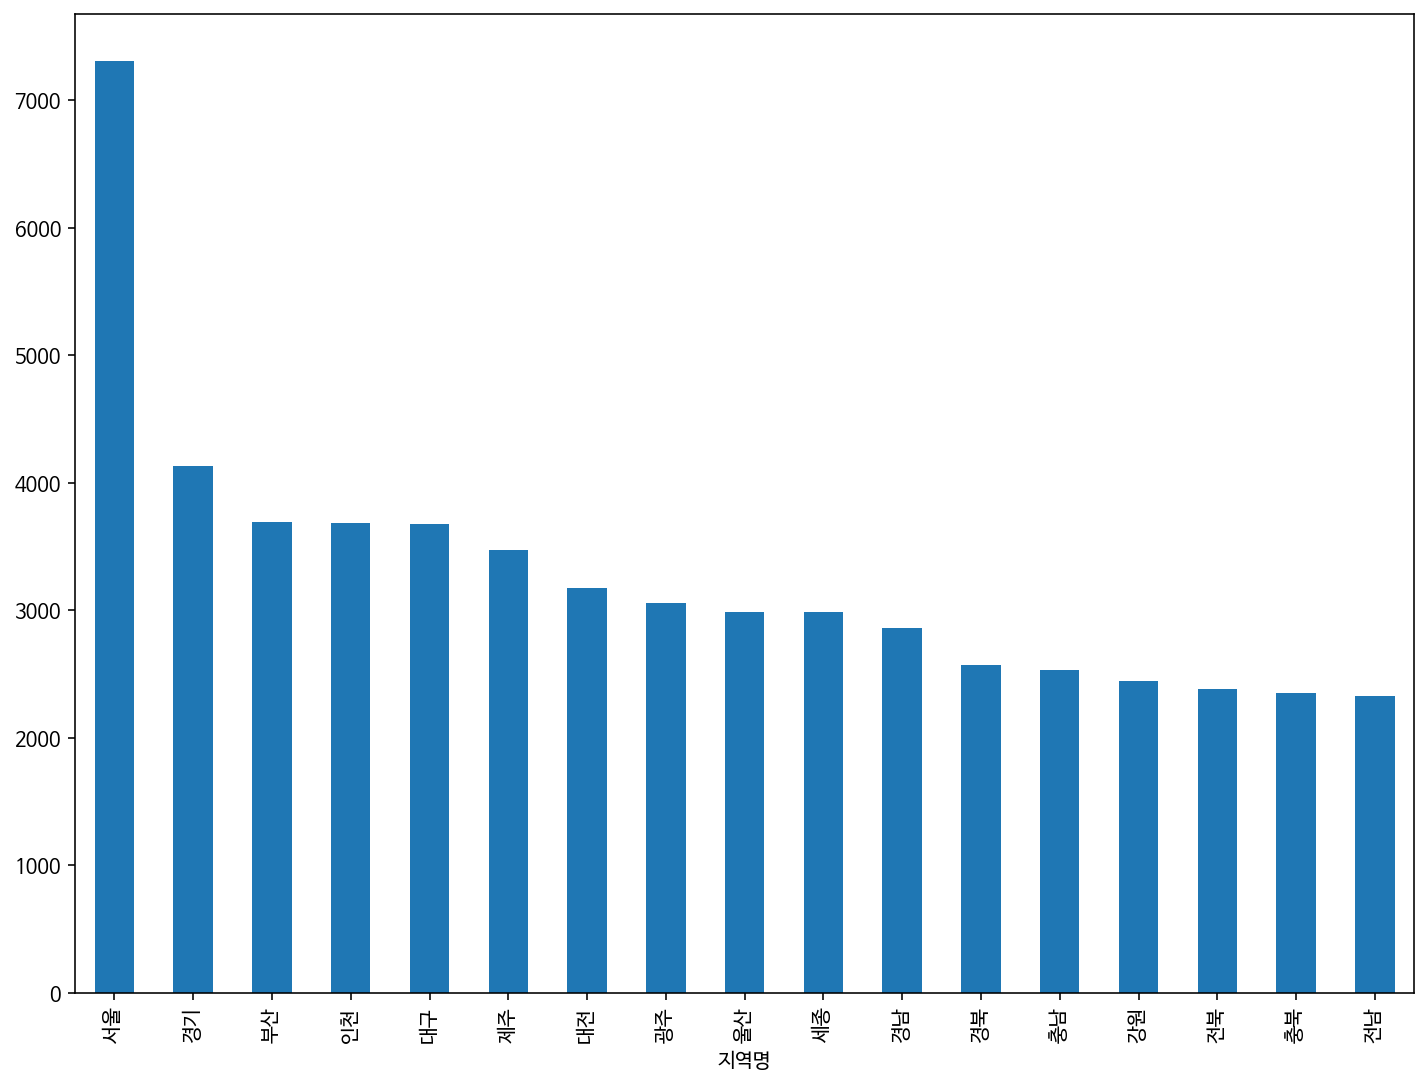

In [37]:
# 분양가격 내림차순으로 정렬해서 확인
local_price_mean_sorted = local_price_mean.sort_values(ascending=False)
local_price_mean_sorted.plot(kind='bar')

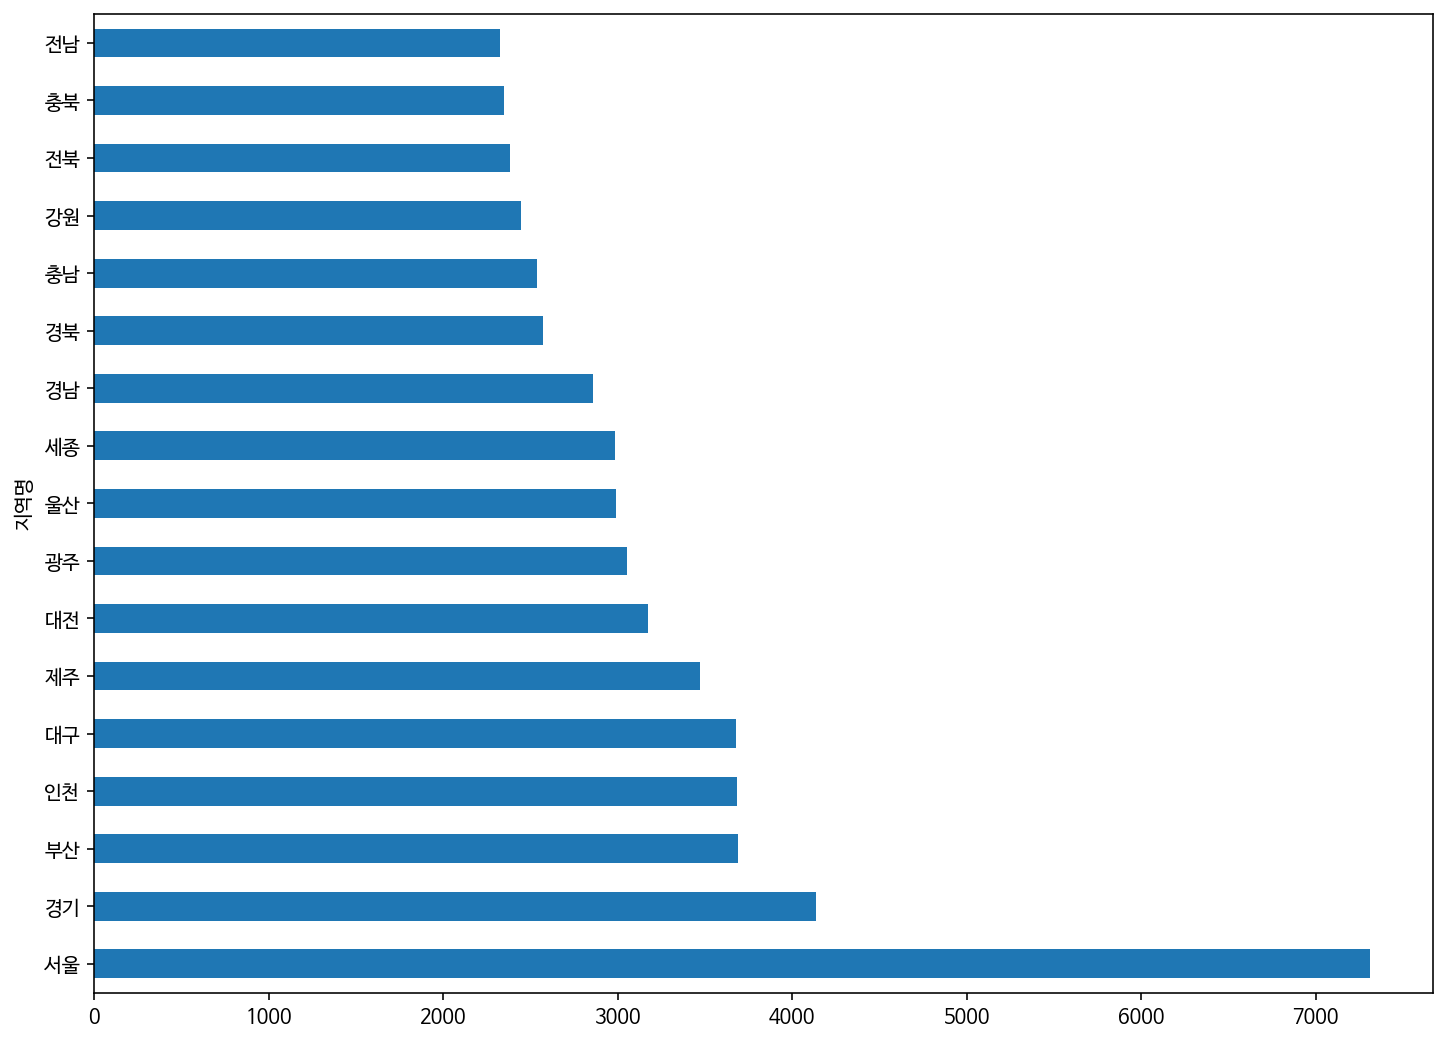

In [38]:
local_price_mean_sorted.plot(kind='barh')

In [39]:
drop_idx = df.loc[df['분양가격'] == 0].index
drop_idx

Int64Index([], dtype='int64')

In [40]:
df = df.drop(drop_idx, axis=0)
df.loc[df['분양가격'] == 0]

,지역명,규모구분,연도,월,분양가격
